In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_LZdllcl.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

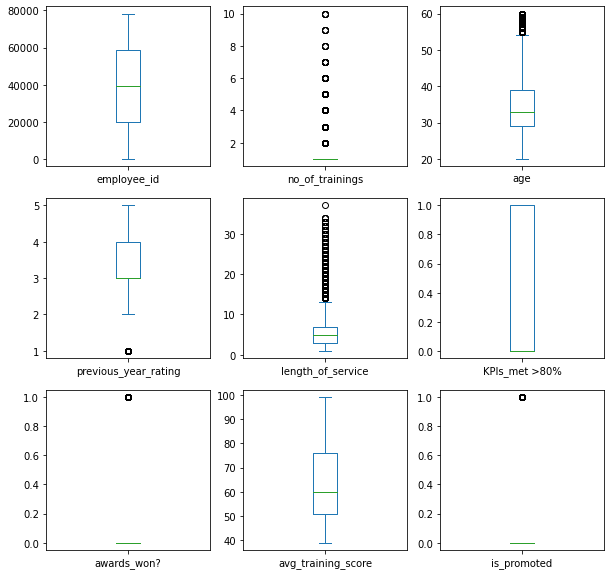

In [6]:
df.plot(kind ='box', subplots =True,sharex =True,sharey= False, layout = (3,3), figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='Count', ylabel='department'>

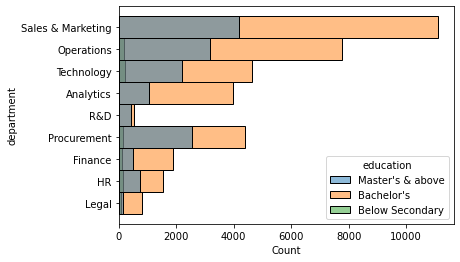

In [7]:
sns.histplot(data = df, y ='department', hue ='education')

<AxesSubplot:xlabel='Count', ylabel='education'>

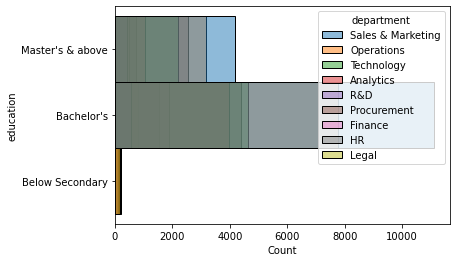

In [8]:
sns.histplot(data = df, y = 'education', hue ='department')

<AxesSubplot:xlabel='age', ylabel='Density'>

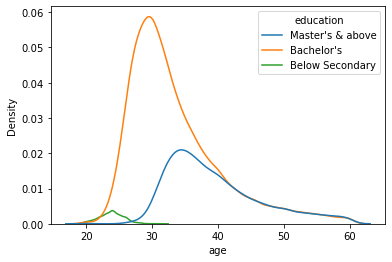

In [9]:
sns.kdeplot(data = df, hue= 'education', x ='age')

<AxesSubplot:>

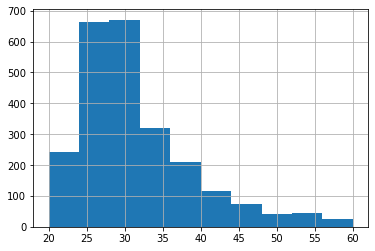

In [10]:
df[df['education'].isna()]['age'].hist()

<AxesSubplot:>

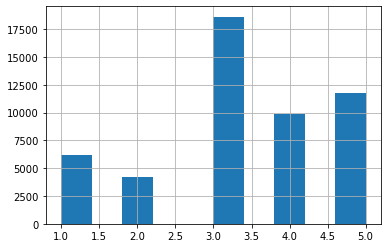

In [11]:
df['previous_year_rating'].hist()

## Missing Values

In [12]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

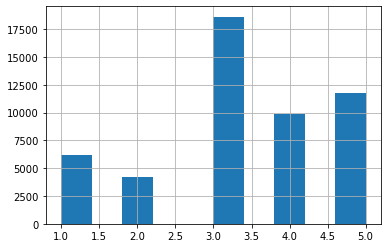

In [13]:
df['previous_year_rating'].hist()

In [14]:
df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [15]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(3.0)

<AxesSubplot:>

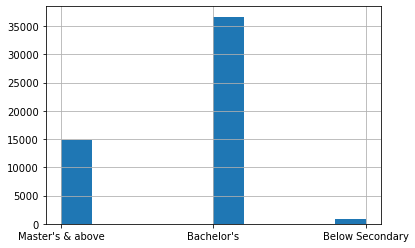

In [16]:
df['education'].hist()

In [17]:
df['education'].mode()

0    Bachelor's
dtype: object

In [18]:
df['education'] = df['education'].fillna("Bachelor's")

In [19]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## OUTLIERS

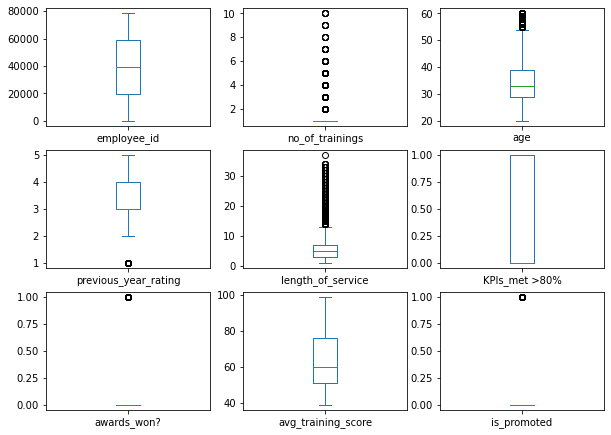

In [20]:
df.plot(kind ='box', subplots =True,sharex =True,sharey= False, layout = (4,3), figsize=(10,10))
plt.show()

In [21]:
q1 = df['age'].quantile(.25)
q3 = df['age'].quantile(.75)
iqr =q3-q1
up = q3+iqr
low =q1-iqr
df.loc[df['age']>up,'age'] = up
up    

49.0

<AxesSubplot:>

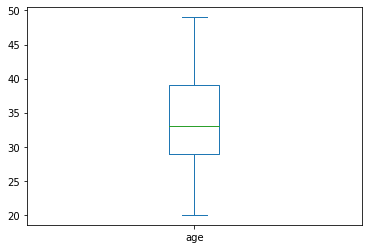

In [22]:
#outlier capping
df['age'].plot(kind ='box')

In [23]:
df['length_of_service'].quantile(.95) #capping at 95th percentile

15.0

In [24]:
df.loc[df['length_of_service']>15.0, 'length_of_service'] = 15.0

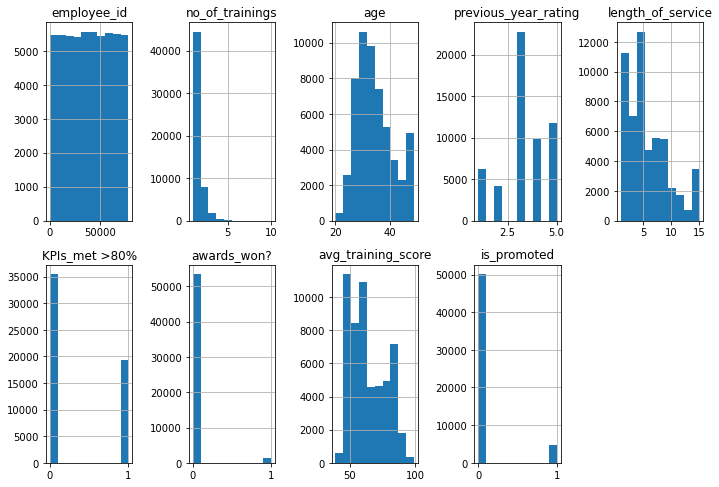

In [25]:
df.hist(figsize=(10,10),layout = (3,5))
plt.tight_layout()
plt.show()

In [26]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Feature Extraction

In [27]:

#Apply the Pca on the input set and get the single column which summarized the input features in the 1 Dimension and used that as a new features.helps to improve the score by 0.5 percent.
#pca column added after scaling
#


## Encoding

In [28]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [29]:
eds = {"Bachelor's": 1, "Master's & above" : 2,"Below Secondary": 3 }
gender = {'m':0, 'f':1}
chanl = {'other' : 0, 'sourcing':1 , 'referred':2}
df['education'] = df['education'].map(eds)
df['gender'] = df['gender'].map(gender)
df['recruitment_channel'] = df['recruitment_channel'].map(chanl)

In [30]:
df['recruitment_channel'].value_counts()

0    30446
1    23220
2     1142
Name: recruitment_channel, dtype: int64

In [31]:
#department, region
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(df['department'])
df['department'] = le1.transform(df[['department']])

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
le2 = LabelEncoder()
le2.fit(df['region'])
df['region'] = le2.transform(df[['region']])

In [33]:
import joblib
joblib.dump(le1, 'le1department.sav')
joblib.dump(le2, 'le2region.sav')

['le2region.sav']

In [34]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Splitting and Scaling

In [35]:
X = df.drop('is_promoted', axis =1)
y = df['is_promoted']

In [36]:
df.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,4.972796,15.428970,1.301690,0.297621,0.465334,1.253011,34.488578,3.304481,5.688129,0.351974,0.023172,63.386750,0.085170
std,22586.581449,2.506046,8.764954,0.489952,0.457216,0.538959,0.609264,6.884666,1.214770,3.689403,0.477590,0.150450,13.371559,0.279137
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,4.000000,11.000000,1.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,5.000000,14.000000,1.000000,0.000000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,7.000000,21.000000,2.000000,1.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,8.000000,33.000000,3.000000,1.000000,2.000000,10.000000,49.000000,5.000000,15.000000,1.000000,1.000000,99.000000,1.000000


In [37]:
X =X.drop('employee_id', axis =1)

In [38]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
sc.fit(X)
X = pd.DataFrame(sc.transform(X), columns = X.columns)

In [39]:
joblib.dump(sc, 'scaler.sav')

['scaler.sav']

In [40]:
X.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04
mean,-3.590845e-16,1.532517e-16,-1.895166e-16,2.879879e-16,-1.486226e-17,-4.077590e-16,-3.300770e-16,-2.250750e-16,4.950376e-16,1.447678e-15,7.609833e-16,8.639840e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.984338e+00,-1.760319e+00,-6.157593e-01,-6.509473e-01,-8.634018e-01,-4.152762e-01,-2.104490e+00,-1.897069e+00,-1.270713e+00,-7.369860e-01,-1.540178e-01,-1.823794e+00
25%,-3.881832e-01,-5.053091e-01,-6.157593e-01,-6.509473e-01,-8.634018e-01,-4.152762e-01,-7.972250e-01,-2.506515e-01,-7.286149e-01,-7.369860e-01,-1.540178e-01,-9.263589e-01
50%,1.085547e-02,-1.630338e-01,-6.157593e-01,-6.509473e-01,-8.634018e-01,-4.152762e-01,-2.162184e-01,-2.506515e-01,-1.865168e-01,-7.369860e-01,-1.540178e-01,-2.532824e-01
75%,8.089329e-01,6.356087e-01,1.425277e+00,1.536223e+00,9.920455e-01,-4.152762e-01,6.552914e-01,5.725572e-01,3.555812e-01,1.356878e+00,-1.540178e-01,9.432980e-01
max,1.207972e+00,2.004710e+00,3.466313e+00,1.536223e+00,2.847493e+00,1.435678e+01,2.107808e+00,1.395766e+00,2.523973e+00,1.356878e+00,6.492758e+00,2.663382e+00


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(X)
x_pca = pca.transform(X)
X['pca1'] = x_pca
joblib.dump(pca, 'pca.sav')


['pca.sav']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [43]:
from sklearn.metrics import confusion_matrix,f1_score

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf =RandomForestClassifier()
parameters = { 'n_estimators': [200,400], 
               'max_depth': [15,None] ,
                            }
cv = GridSearchCV(rf, parameters, cv =5, scoring ='accuracy',n_jobs =-1)
cv.fit(X_train, y_train)
cv

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, None], 'n_estimators': [200, 400]},
             scoring='accuracy')

In [45]:
print(cv.best_params_, cv.best_score_)
depth = cv.best_params_['max_depth']
estimators = cv.best_params_['n_estimators']
rf1 = RandomForestClassifier(max_depth = depth , n_estimators = estimators)
rf1.fit(X_train,y_train)

{'max_depth': None, 'n_estimators': 400} 0.9314418562436113


RandomForestClassifier(n_estimators=400)

In [46]:
y_pred = rf1.predict(X_test)
f1_score(y_test, y_pred), confusion_matrix(y_test, y_pred)

(0.40632805995004156,
 array([[10005,    49],
        [  664,   244]], dtype=int64))

In [47]:
import joblib
joblib.dump(rf1, 'rf1.sav')

['rf1.sav']

In [48]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = { 
    'n_estimators':[ 100, 300, 500],
    'max_depth':[1,3,5],
    'learning_rate': [.01, .1]
}
cvgb = GridSearchCV(gb, parameters, cv =5)
cvgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 3, 5],
                         'n_estimators': [100, 300, 500]})

In [49]:
print(cvgb.best_estimator_)
print(cvgb.best_params_)
lr = cvgb.best_params_['learning_rate']
depth = cvgb.best_params_['max_depth']
estimators = cvgb.best_params_['n_estimators']

gb1 = GradientBoostingClassifier(learning_rate=lr, max_depth=depth, n_estimators=estimators)
gb1.fit(X_train, y_train)
gb1_pred = gb1.predict(X_test)
f1_score(y_test, gb1_pred), confusion_matrix(y_test, gb1_pred)

GradientBoostingClassifier(max_depth=5)
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


(0.4823625922887613,
 array([[10037,    17],
        [  614,   294]], dtype=int64))

In [50]:
joblib.dump(gb1, 'gb1.sav')

['gb1.sav']

In [51]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
xgb1_pred = xgbc.predict(X_test)
f1_score(y_test, xgb1_pred), confusion_matrix(y_test, xgb1_pred )

(0.5074862096138693,
 array([[10015,    39],
        [  586,   322]], dtype=int64))

In [52]:
joblib.dump(xgbc, 'xgbc.sav')

['xgbc.sav']